In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
from scipy.stats import norm
import statistics
import matplotlib.pyplot as plt


In [ ]:
from sklearn import preprocessing

In [ ]:
data=pd.read_csv('StudentsPerformance_modified.csv')

In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [ ]:
data['math score'] = data['math score'].replace('?', 0.0)

In [ ]:
data['math score'] = data['math score'].map(lambda x: float(x))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    float64
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
 data.fillna(data.mean(),inplace=True)

<ipython-input-47-d85acd3950fb>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [ ]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

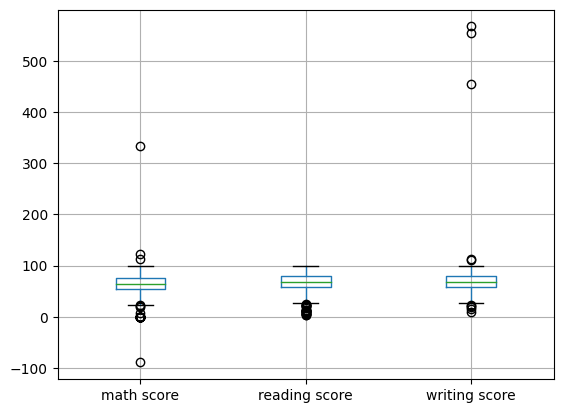

In [ ]:
data.boxplot()

In [ ]:
z=np.abs(stats.zscore(data['reading score']))
print(z)
outliers=[]
threshold=3
for i in range(len(z)):
  if(z[i]>threshold):
    outliers.append(z[i])
outliers
print("The no of outliers are: ",len(outliers))


0      0.241292
1      1.329296
2      1.631519
3      0.665378
4      0.603960
         ...   
995    1.873298
996    0.786267
997    0.180847
998    0.603960
999    1.087517
Name: reading score, Length: 1000, dtype: float64
The no of outliers are:  17


In [ ]:
mathq1 = data['math score'].quantile(0.25)
mathq3 = data['math score'].quantile(0.75)
iqr=mathq3-mathq1

In [ ]:
lower_limit = mathq1 - 1.5 * iqr
upper_limit=mathq3+1.5*iqr

In [ ]:
data.loc[(data['math score'] < lower_limit), 'math score'] = lower_limit
data.loc[(data['math score'] > upper_limit), 'math score'] = upper_limit

In [ ]:
readingq1 = data['reading score'].quantile(0.25)
readingq3 = data['reading score'].quantile(0.75)
iqr_reading=readingq3-readingq1
writeq1 = data['writing score'].quantile(0.25)
writeq3 = data['writing score'].quantile(0.75)
iqr_write=writeq3-writeq1

In [ ]:
read_ll=readingq1-1.5*iqr_reading
write_ll=writeq1-1.5*iqr_write
read_ul=readingq3+1.5*iqr_reading
write_ul=writeq3+1.5*iqr_write


In [ ]:
data.loc[(data['reading score'] < read_ll), 'reading score'] = read_ll
data.loc[(data['reading score'] > read_ul), 'reading score'] = read_ul
data.loc[(data['writing score'] < write_ll), 'writing score'] = write_ll
data.loc[(data['writing score'] > write_ul), 'writing score'] = write_ul

<Axes: >

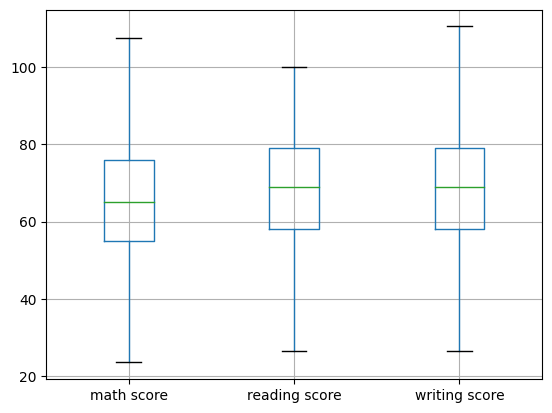

In [ ]:
data.boxplot()

In [ ]:
data.shape

(1000, 8)

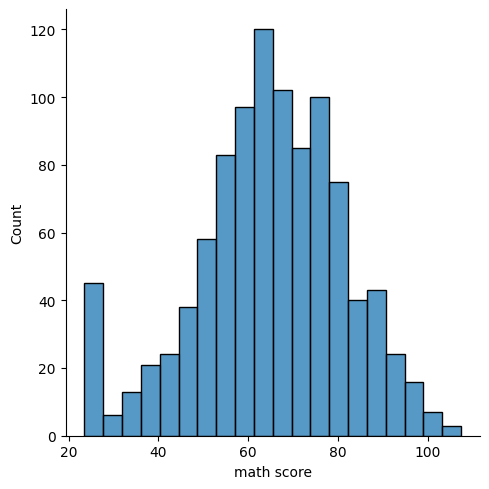

In [ ]:

sns.displot(data['math score'])

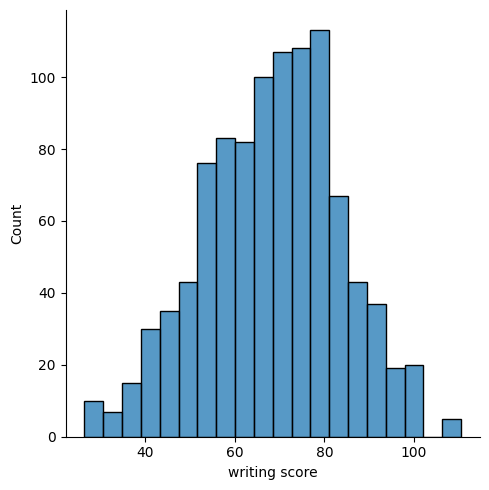

In [ ]:
sns.displot(data['writing score'])

In [ ]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(data[['math score','reading score','writing score']])
robust_df = pd.DataFrame(robust_df, columns =['math score', 'reading score','writing score'])

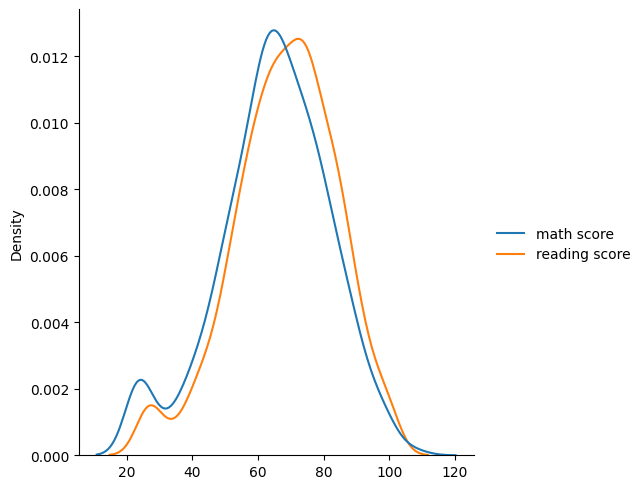

In [ ]:
sns.displot(data[['math score','reading score']], kind='kde')
# sns.displot(robust_df['math score'], kind='kde')

In [ ]:
normalized_df=robust_df.copy()
for column in normalized_df[['math score','reading score','writing score']]:
  normalized_df[column] = (normalized_df[column] - normalized_df[column].min()) / (normalized_df[column].max() - normalized_df[column].min())


In [ ]:
normalized_df

,math score,reading score,writing score
0,0.577381,0.619048,0.565476
1,0.541667,0.863946,0.732143
2,0.791667,0.931973,0.791667
3,0.279762,0.414966,0.208333
4,0.625000,0.700680,0.577381
...,...,...,...
995,0.767857,0.986395,0.815476
996,0.458333,0.387755,0.339286
997,0.422619,0.605442,0.458333
998,0.529762,0.700680,0.601190


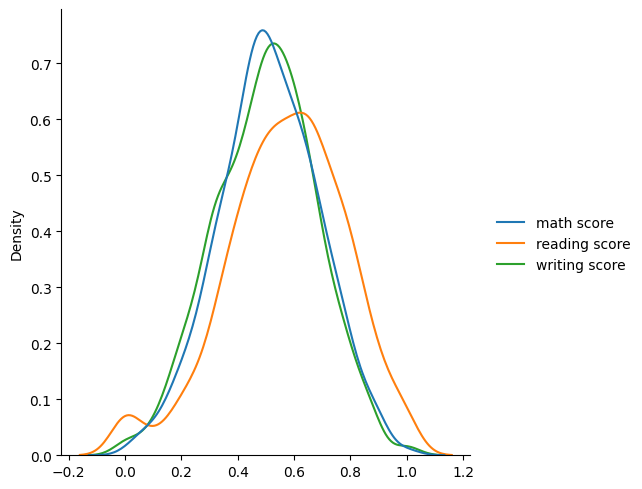

In [ ]:
sns.displot(normalized_df[normalized_df['math score']>0], kind='kde')